# Hyperparamètres, LassoRandomForestRregressor et grid_search (correction)

Le notebook explore l'optimisation des hyper paramaètres du modèle [LassoRandomForestRegressor](http://www.xavierdupre.fr/app/ensae_teaching_cs/helpsphinx3/ensae_teaching_cs/ml/lasso_random_forest_regressor.html), et fait varier le nombre d'arbre et le paramètres alpha.

In [1]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

In [2]:
%matplotlib inline

## Données

In [3]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
data = load_boston()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y)

## Premiers modèles

In [4]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

rf = RandomForestRegressor()
rf.fit(X_train, y_train)
r2_score(y_test, rf.predict(X_test))

0.7968308255996621

Pour le modèle, il suffit de copier coller le code écrit dans ce fichier [lasso_random_forest_regressor.py](https://github.com/sdpython/ensae_teaching_cs/blob/master/src/ensae_teaching_cs/ml/lasso_random_forest_regressor.py).

In [5]:
from ensae_teaching_cs.ml.lasso_random_forest_regressor import LassoRandomForestRegressor
lrf = LassoRandomForestRegressor()
lrf.fit(X_train, y_train)
r2_score(y_test, lrf.predict(X_test))

C:\xavierdupre\__home_\github_fork\scikit-learn\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20.049045743243255, tolerance: 3.3370377783641163
  positive)


0.7935381412849827

Le modèle a réduit le nombre d'arbres.

In [6]:
len(lrf.estimators_)

40

## Grid Search

On veut trouver la meilleure paire de paramètres (``n_estimators``, ``alpha``). *scikit-learn* implémente l'objet [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) qui effectue de nombreux apprentissage avec toutes les valeurs de paramètres qu'il reçoit. Voici tous les paramètres qu'on peut changer :

In [7]:
lrf.get_params()

{'lasso_estimator__alpha': 1.0,
 'lasso_estimator__copy_X': True,
 'lasso_estimator__fit_intercept': True,
 'lasso_estimator__max_iter': 1000,
 'lasso_estimator__normalize': False,
 'lasso_estimator__positive': False,
 'lasso_estimator__precompute': False,
 'lasso_estimator__random_state': None,
 'lasso_estimator__selection': 'cyclic',
 'lasso_estimator__tol': 0.0001,
 'lasso_estimator__warm_start': False,
 'lasso_estimator': Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
       normalize=False, positive=False, precompute=False, random_state=None,
       selection='cyclic', tol=0.0001, warm_start=False),
 'rf_estimator__bootstrap': True,
 'rf_estimator__ccp_alpha': 0.0,
 'rf_estimator__criterion': 'mse',
 'rf_estimator__max_depth': None,
 'rf_estimator__max_features': 'auto',
 'rf_estimator__max_leaf_nodes': None,
 'rf_estimator__max_samples': None,
 'rf_estimator__min_impurity_decrease': 0.0,
 'rf_estimator__min_impurity_split': None,
 'rf_estimator__min_samples_leaf

In [8]:
params = {
    'lasso_estimator__alpha': [0.25, 0.5, 0.75, 1., 1.25, 1.5],
    'rf_estimator__n_estimators': [20, 40, 60, 80, 100, 120]
}

In [9]:
from sklearn.exceptions import ConvergenceWarning
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

grid = GridSearchCV(estimator=LassoRandomForestRegressor(),
                    param_grid=params, verbose=1)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:   36.4s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=LassoRandomForestRegressor(lasso_estimator=Lasso(alpha=1.0,
                                                                        copy_X=True,
                                                                        fit_intercept=True,
                                                                        max_iter=1000,
                                                                        normalize=False,
                                                                        positive=False,
                                                                        precompute=False,
                                                                        random_state=None,
                                                                        selection='cyclic',
                                                                        tol=0.0001,
                                                                        warm_sta

Les meilleurs paramètres sont les suivants :

In [10]:
grid.best_params_

{'lasso_estimator__alpha': 0.5, 'rf_estimator__n_estimators': 120}

Et le modèle a gardé un nombre réduit d'arbres :

In [11]:
len(grid.best_estimator_.estimators_)

45

In [12]:
r2_score(y_test, grid.predict(X_test))

0.7991144265597927

## Evolution de la performance en fonction des paramètres

In [13]:
grid.cv_results_

{'mean_fit_time': array([0.05663986, 0.10452576, 0.16595559, 0.22539721, 0.27168226,
        0.33429265, 0.05565419, 0.10729852, 0.17114191, 0.23077893,
        0.28304234, 0.33431249, 0.05604181, 0.1063158 , 0.17093563,
        0.22779045, 0.26768265, 0.35245051, 0.06323156, 0.14401121,
        0.19288373, 0.25152674, 0.29241681, 0.32273645, 0.05465369,
        0.10490837, 0.17751675, 0.24574986, 0.27805681, 0.32074413,
        0.06244035, 0.10291305, 0.16654687, 0.21403375, 0.2806407 ,
        0.3367074 ]),
 'std_fit_time': array([0.00683437, 0.00293675, 0.00649722, 0.00437011, 0.00134492,
        0.00543854, 0.00469317, 0.00437525, 0.01169219, 0.00994201,
        0.00682215, 0.01900377, 0.00391298, 0.00280159, 0.00885593,
        0.01138138, 0.00560277, 0.02105583, 0.00461818, 0.04150351,
        0.00681097, 0.02927737, 0.02726511, 0.00809343, 0.00521671,
        0.00265498, 0.02124133, 0.0162238 , 0.00868051, 0.00878851,
        0.00323922, 0.00170647, 0.00951473, 0.00600412, 0.014

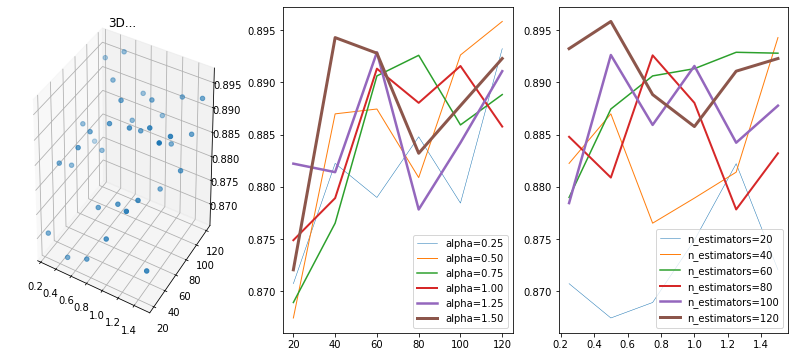

In [14]:
import numpy
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot(131, projection='3d')
xs = numpy.array([el['lasso_estimator__alpha'] for el in grid.cv_results_['params']])
ys = numpy.array([el['rf_estimator__n_estimators'] for el in grid.cv_results_['params']])
zs = numpy.array(grid.cv_results_['mean_test_score'])
ax.scatter(xs, ys, zs)
ax.set_title("3D...")

ax = fig.add_subplot(132)
for x in sorted(set(xs)):
    y2 = ys[xs == x]
    z2 = zs[xs == x]
    ax.plot(y2, z2, label="alpha=%1.2f" % x, lw=x*2)
ax.legend();

ax = fig.add_subplot(133)
for y in sorted(set(ys)):
    x2 = xs[ys == y]
    z2 = zs[ys == y]
    ax.plot(x2, z2, label="n_estimators=%d" % y, lw=y/40)
ax.legend();

Il semble que la valeur de alpha importe peu mais qu'un grand nombre d'arbres a un impact positif. Cela dit, il faut ne pas oublier l'écart-type de ces variations qui n'est pas négligeable.